In [1]:
from sklearn import svm

In [2]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [3]:
print(clf.predict([[-2, 3]]))

[2]


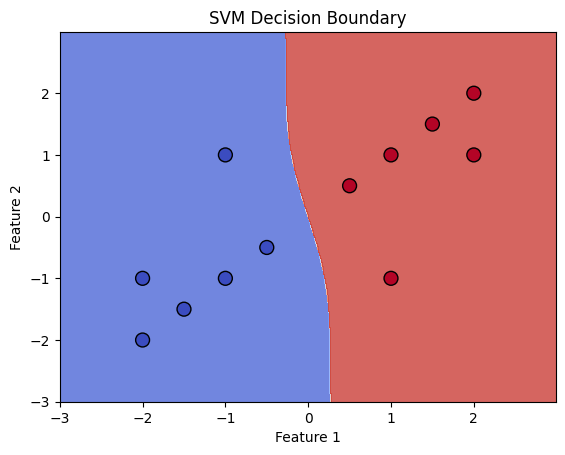

In [4]:
import matplotlib.pyplot as plt
# Generate additional data points
X = np.array([
    [-1, -1], [-2, -1], [1, 1], [2, 1], 
    [-1.5, -1.5], [1.5, 1.5], [0.5, 0.5], [-0.5, -0.5], 
    [-2, -2], [2, 2], [1, -1], [-1, 1]
])
y = np.array([1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1])


from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', C = 20))
# adding one more parameter c = controls tradeoff between smooth decision boundary and classifying training points correctly
clf.fit(X, y)

# Plot the decision boundary
def plot_decision_boundary(clf, X, y):
    # Create a mesh to plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict on the mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Call the function to plot
plot_decision_boundary(clf, X, y)

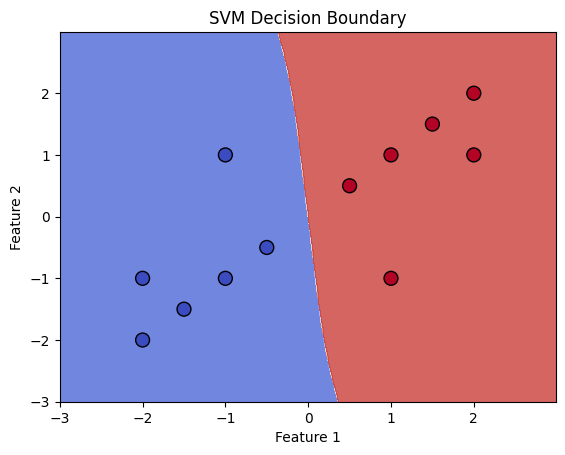

In [5]:
# Generate additional data points
X = np.array([
    [-1, -1], [-2, -1], [1, 1], [2, 1], 
    [-1.5, -1.5], [1.5, 1.5], [0.5, 0.5], [-0.5, -0.5], 
    [-2, -2], [2, 2], [1, -1], [-1, 1]
])
y = np.array([1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1])


from sklearn.svm import SVC
clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto', C = 1))
# adding one more parameter c = controls tradeoff between smooth decision boundary and classifying training points correctly
clf2.fit(X, y)
plot_decision_boundary(clf2, X, y)

In [6]:
import pandas as pd

In [7]:
nRowsRead = None  # Specify 'None' to read the whole file
df1 = pd.read_csv('data_files/spam.csv', delimiter=',', encoding='ISO-8859-1')
df1.dataframeName = 'spam.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 5572 rows and 5 columns


In [8]:
df1

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
# Drop unnecessary columns (Unnamed columns)
df1 = df1[['v1', 'v2']]  # Select only the relevant columns

# Rename columns for easier access
df1.columns = ['label', 'message']

# Check for missing values and drop rows with NaN in either column
df1 = df1.dropna(subset=['label', 'message'])

In [10]:
df1

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
# Map 'ham' to 0 and 'spam' to 1
df1['label'] = df1['label'].map({'ham': 0, 'spam': 1})

In [12]:
df1

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X = df1['message']  # Features: messages
y = df1['label']    # Labels: ham/spam

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Use StandardScaler with sparse data (with_mean=False)
scaler = StandardScaler(with_mean=False)

# Pipeline with StandardScaler and SVM
clf3 = make_pipeline(scaler, SVC(gamma='auto', C=10, kernel='rbf'))


In [26]:
from sklearn.feature_extraction.text import CountVectorizer#
# Vectorize the text data using CountVectorizer (you can also use TfidfVectorizer)
vectorizer = CountVectorizer(stop_words='english')  # Remove common English stop words
X_train_vect = vectorizer.fit_transform(X_train)  # Fit and transform training data
X_test_vect = vectorizer.transform(X_test)        # Only transform test data

In [27]:
clf3.fit(X_train_vect, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('svc', SVC(C=10, gamma='auto'))])

In [28]:
# Make predictions on the test set
y_pred = clf3.predict(X_test_vect)


In [29]:
from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9507
